The global stock market crashed since 23rd March due to COVID-19 pandemic.
Now, we have entered the middle stage of pandemic. In the middle stage, many industries start to recover and gain back investor trust. In this report, we will be reviewing the mid term effect of the pandemic on both the society and the economy.

It would be interesting to review which industries is getting more favours by investor by comparing early and middle stage of pandemic stock S&P.

1) Overview of the distribution of sectors in S&P500<br>
2) Market Cap has recovered back to pre-pandemic level.<br>
3) Quick glance at latest components of S&P500 scaled by Market CAP, grouped by sector<br>
4) Trend based on market cap change% from 23 March to 23 June (investor fear is fading, reason? possibly it is best trading oppurtunity, it caused highest price rise in trading sector)<br>
5) Trend based on market cap change% from 23 June to 11 Sep (reveal the real society concern, copper price continue surge since 23June)



period1: 1 Jan-23 March <br>
period2: 23 March-23 June<br>
period3: 23 June-11 Sep
Reference link: <http://adilmoujahid.com/posts/2020/04/stocks-analysis-covid19-coronavirus-python/>


Raw data required:<br>
-----------
|Symbol || GICS Sector || GICS Sub Industry || Price_1_1 || Price_23_3 || Price_23_6 || Price_11_9 || Share || Period1 Price change || Period2 P.chg. || Period3 P.chg. || Period1 Market Cap chg || Period2 Market Cap chg || Period3 Market Cap chg

Part A: Data Handling

In [1]:
#install yfinance package first
!pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=403d3c2a77312e3f302243e948499c19fb1a439f4a2e6ffe0d655d139bd664dc
  Stored in directory: /tmp/pip-ephem-wheel-cache-pok0mvbw/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [2]:
## Import required libraries
import yfinance as yf
import pandas as pd
import pandas_datareader as web
import numpy as np
import math
import datetime

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
#Section1(preparation) 1.1: get sp500 list from website
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

stocks_df = pd.read_html(url, header=0)[0]

stocks_df.head()
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 505 non-null    object
 1   Security               505 non-null    object
 2   SEC filings            505 non-null    object
 3   GICS Sector            505 non-null    object
 4   GICS Sub Industry      505 non-null    object
 5   Headquarters Location  505 non-null    object
 6   Date first added       449 non-null    object
 7   CIK                    505 non-null    int64 
 8   Founded                496 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.6+ KB


In [4]:
#1.2 correct stock symbols
mapping={}
for stock in stocks_df["Symbol"]:
    try:
        stock_data = stock.replace(".","-")
        mapping[stock]=stock_data

    except:
      mapping[stock]=stock
      pass
      
stocks_df.replace({'Symbol': mapping}, inplace=True)
print(stocks_df[410:420])

    Symbol                  Security  ...      CIK Founded
410    SLB         Schlumberger Ltd.  ...    87347    1926
411    STX        Seagate Technology  ...  1137789    1979
412    SEE                Sealed Air  ...  1012100    1960
413    SRE             Sempra Energy  ...  1032208    1998
414    NOW                ServiceNow  ...  1373715    2003
415    SHW          Sherwin-Williams  ...    89800    1866
416    SPG  Simon Property Group Inc  ...  1063761    2003
417   SWKS        Skyworks Solutions  ...     4127    2002
418    SLG           SL Green Realty  ...  1040971    1997
419    SNA                   Snap-on  ...    91440    1920

[10 rows x 9 columns]


stock SPG(no. 416) is missing from Yahoo at this moment

In [5]:
#1.3 remove 'SPG' to finalize the list of tickers
tickers=list(stocks_df["Symbol"])
tickers_original = tickers.copy()
tickers.remove('SPG')
print(len(tickers))
#market cap moved to section4
#pe_data=web.get_quote_yahoo(tickers)['marketCap']
#print(pe_data)

504


In [6]:
##(skip this cell) an alternative to previous method of retrieving tickers:
import bs4 as bs
import requests
import yfinance as yf
import datetime

resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers_alter = []
for row in table.findAll('tr')[1:]:
    ticker_alter = row.findAll('td')[0].text
    tickers_alter.append(ticker_alter)

tickers_alter = [s.replace('\n', '') for s in tickers]


In [7]:
#Section2(Stock price) 2.1 get historical sp500 Volume & Stock price
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2020,9,12)
data = yf.download(tickers, start=start, end=end)
print(data['Close'])
print(data['Volume'])

[*********************100%***********************]  504 of 504 completed
                    A        AAL         AAP  ...        ZBRA       ZION         ZTS
Date                                          ...                                   
2019-12-31        NaN        NaN         NaN  ...         NaN        NaN         NaN
2020-01-02  85.949997  29.090000  159.410004  ...  259.140015  52.439999  134.139999
2020-01-03  84.570000  27.650000  159.419998  ...  256.049988  51.700001  134.160004
2020-01-06  84.820000  27.320000  156.800003  ...  258.010010  51.070000  133.130005
2020-01-07  85.080002  27.219999  154.940002  ...  256.470001  50.759998  133.580002
...               ...        ...         ...  ...         ...        ...         ...
2020-09-04  96.839996  13.610000  153.750000  ...  260.549988  33.680000  157.240005
2020-09-08  95.139999  13.630000  151.729996  ...  249.259995  32.220001  153.509995
2020-09-09  97.930000  13.050000  154.350006  ...  255.110001  32.119999  158

In [8]:
sp500 = yf.download('^GSPC',start, end)
sp500_price = pd.DataFrame(sp500['Adj Close'].values)
sp500_price.index = sp500.index.values[0:sp500.index.values.shape[0]]
sp500_price.columns = ['S&P 500']

[*********************100%***********************]  1 of 1 completed


In [9]:
#step 2.2. get stock data at given points of time
data_stock_01_02 = data['Close'].loc['2020-01-02', : ]
data_stock_03_23 = data['Close'].loc['2020-03-23', : ]
data_stock_06_23 = data['Close'].loc['2020-06-23', : ]
data_stock_09_11 = data['Close'].loc['2020-09-11', : ]
data_stock = pd.DataFrame({'2020-01-02': data_stock_01_02 ,'2020-03-23':data_stock_03_23,'2020-06-23':data_stock_06_23,'2020-09-11':data_stock_09_11},index=data_stock_01_02.index)

print(data_stock)

#step 2.3. get stock data at given points of time
data_volume_01_02 = data['Volume'].loc['2020-01-02', : ]
data_volume_03_23 = data['Volume'].loc['2020-03-23', : ]
data_volume_06_23 = data['Volume'].loc['2020-06-23', : ]
data_volume_09_11 = data['Volume'].loc['2020-09-11', : ]
data_volume = pd.DataFrame({'2020-01-02': data_volume_01_02 ,'2020-03-23':data_volume_03_23,'2020-06-23':data_volume_06_23,'2020-09-11':data_volume_09_11},index=data_volume_01_02.index)

print(data_volume)

      2020-01-02  2020-03-23  2020-06-23  2020-09-11
A      85.949997   63.369999   89.279999   98.599998
AAL    29.090000   10.250000   14.000000   12.950000
AAP   159.410004   78.500000  149.970001  154.589996
AAPL   75.087502   56.092499   91.632500  112.000000
ABBV   89.550003   64.500000   97.309998   89.699997
...          ...         ...         ...         ...
YUM   102.169998   56.520000   87.919998   92.269997
ZBH   149.199997   80.809998  125.959999  139.210007
ZBRA  259.140015  170.720001  260.769989  249.960007
ZION   52.439999   24.080000   35.480000   31.490000
ZTS   134.139999   92.660004  138.110001  158.589996

[504 rows x 4 columns]
       2020-01-02   2020-03-23   2020-06-23   2020-09-11
A       1410500.0    2989600.0    1160300.0    1368600.0
AAL     6451100.0   56427300.0  204022300.0   43916700.0
AAP      944900.0    1476000.0    1210300.0     493900.0
AAPL  135480400.0  336752800.0  212155600.0  180860300.0
ABBV    5639200.0   19219000.0    6715600.0    8385800.

In [10]:
##Section3(Sector info)
#3.1 sector and subsector list from web
sectors = stocks_df["GICS Sector"].tolist()
del sectors[416]

subsectors = stocks_df["GICS Sub Industry"].tolist()
del subsectors[416]

security = stocks_df["Security"].tolist()
del security[416]

#below is an alternative
#sectors = []
#for row in table.findAll('tr')[1:]:
#    sector = row.findAll('td')[3].text
#    sectors.append(sector)
#sectors = [s.replace('\n', '') for s in sectors]

len(sectors) # =504 now
#3.2 get data of sector info
df_sector = pd.DataFrame(sectors,index = tickers, columns =['Sector'])
df_subsector = pd.DataFrame(subsectors,index = tickers, columns =['Sub Sector'])
df_security = pd.DataFrame(security,index = tickers, columns =['Security Name'])
print(df_sector.head(10))
print(df_subsector.head(10))
print(df_security.head(10))

                      Sector
MMM              Industrials
ABT              Health Care
ABBV             Health Care
ABMD             Health Care
ACN   Information Technology
ATVI  Communication Services
ADBE  Information Technology
AMD   Information Technology
AAP   Consumer Discretionary
AES                Utilities
                                        Sub Sector
MMM                       Industrial Conglomerates
ABT                          Health Care Equipment
ABBV                               Pharmaceuticals
ABMD                         Health Care Equipment
ACN                 IT Consulting & Other Services
ATVI                Interactive Home Entertainment
ADBE                          Application Software
AMD                                 Semiconductors
AAP                              Automotive Retail
AES   Independent Power Producers & Energy Traders
                   Security Name
MMM                   3M Company
ABT          Abbott Laboratories
ABBV                 

Industrials               73
Information Technology    71
Financials                66
Health Care               62
Consumer Discretionary    61
Consumer Staples          33
Real Estate               30
Utilities                 28
Materials                 28
Energy                    26
Communication Services    26
Name: Sector, dtype: int64


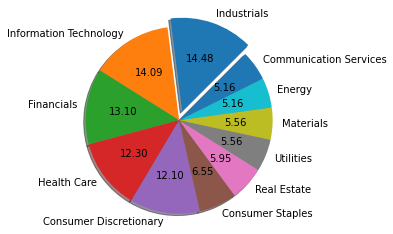

In [11]:
import matplotlib.pyplot as plt
#3.3 sector counts
print(df_sector['Sector'].value_counts())

#3.4 pie chart of sector distribution
#added percentage
Explode = [0.1,0,0,0,0,0,0,0,0,0,0]
plt.pie(df_sector['Sector'].value_counts().tolist(),explode=Explode,labels=df_sector['Sector'].value_counts().index.tolist(), autopct='%.2f',shadow=True,startangle=45) # To create pie chart.
plt.axis('equal')
#plt.legend(title="List of Sectors")
plt.show()

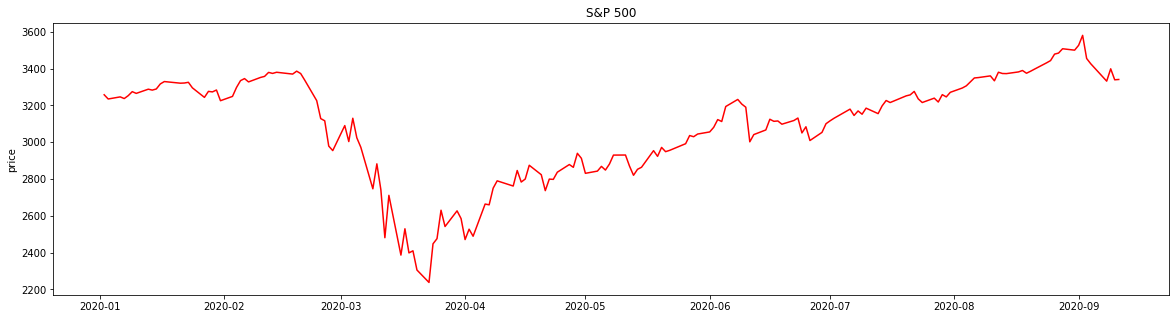

In [12]:
plt.figure(figsize=(20,5));
plt.plot(sp500_price.index, sp500_price, color="red");
plt.ylabel('price');
plt.title('S&P 500');

In [13]:
# Section4(Market Cap)
#4.1. get market cap
from pandas_datareader import data
df_cap = data.get_quote_yahoo(tickers)['marketCap']
print(df_cap.head(5))


MMM      96990085120
ABT     193087438848
ABBV    158305239040
ABMD     12156464128
ACN     150444097536
Name: marketCap, dtype: int64


In [14]:
#4.2 get shares (note: Did the article ignore stock split?)
df_share = pd.DataFrame()
for ele in tickers:
  df_share = df_share.append(data.get_quote_yahoo(ele)['sharesOutstanding'].to_frame())


In [15]:
#4.3 get integrated dataframe
df_total = pd.merge(data_stock, df_share, left_index=True, right_index=True)
df_total = pd.merge(df_total, df_sector, left_index=True, right_index=True)
df_total = pd.merge(df_total, df_subsector, left_index=True, right_index=True)
df_total = pd.merge(df_total, df_security, left_index=True, right_index=True)
print(df_total.info())

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, A to ZTS
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   2020-01-02         502 non-null    float64
 1   2020-03-23         504 non-null    float64
 2   2020-06-23         504 non-null    float64
 3   2020-09-11         504 non-null    float64
 4   sharesOutstanding  504 non-null    int64  
 5   Sector             504 non-null    object 
 6   Sub Sector         504 non-null    object 
 7   Security Name      504 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 35.4+ KB
None


In [16]:
# 2020-01-02: miss CARR OTIS
# 2020-03-23: miss HWM
print(df_total[df_total['2020-01-02'].isnull()].index)
print(df_total[df_total['2020-03-23'].isnull()].index)

Index(['CARR', 'OTIS'], dtype='object')
Index([], dtype='object')


In [17]:
df_total.drop(['CARR','OTIS','HWM'], inplace=True)

In [18]:
print(df_total.info())

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, A to ZTS
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   2020-01-02         501 non-null    float64
 1   2020-03-23         501 non-null    float64
 2   2020-06-23         501 non-null    float64
 3   2020-09-11         501 non-null    float64
 4   sharesOutstanding  501 non-null    int64  
 5   Sector             501 non-null    object 
 6   Sub Sector         501 non-null    object 
 7   Security Name      501 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 35.2+ KB
None


In [19]:
#4.4 adding market cap(historical)
df_total["Marketcap_1_2"] = df_total["2020-01-02"] * df_total["sharesOutstanding"]
df_total["Marketcap_3_23"] = df_total["2020-03-23"] * df_total["sharesOutstanding"]
df_total["Marketcap_6_23"] = df_total["2020-06-23"] * df_total["sharesOutstanding"]
df_total["Marketcap_9_11"] = df_total["2020-09-11"] * df_total["sharesOutstanding"]
print(df_total.head())

      2020-01-02  2020-03-23  ...  Marketcap_6_23  Marketcap_9_11
A      85.949997   63.369999  ...    2.752592e+10    3.039937e+10
AAL    29.090000   10.250000  ...    7.113540e+09    6.580025e+09
AAP   159.410004   78.500000  ...    1.036875e+10    1.068817e+10
AAPL   75.087502   56.092499  ...    1.567145e+12    1.915480e+12
ABBV   89.550003   64.500000  ...    1.717356e+11    1.583052e+11

[5 rows x 12 columns]


In [20]:
#4.5 Adding percentage change of stock prices
df_total["PercentageChange_3_23to_1_2"] = (df_total["2020-03-23"] - df_total["2020-01-02"]) / df_total["2020-01-02"]*100
df_total["PercentageChange_6_23to_3_23"] = (df_total["2020-06-23"] - df_total["2020-03-23"]) / df_total["2020-03-23"]*100
df_total["PercentageChange_9_11to_6_23"] = (df_total["2020-09-11"] - df_total["2020-06-23"]) / df_total["2020-06-23"]*100
print(df_total.head())

      2020-01-02  ...  PercentageChange_9_11to_6_23
A      85.949997  ...                     10.439068
AAL    29.090000  ...                     -7.500001
AAP   159.410004  ...                      3.080613
AAPL   75.087502  ...                     22.227376
ABBV   89.550003  ...                     -7.820369

[5 rows x 15 columns]


In [21]:
#4.6 Change in the total market cap of the S&P 500
print(sum(df_total["Marketcap_3_23"] - df_total["Marketcap_1_2"]) / 10**9)
print(sum(df_total["Marketcap_6_23"] - df_total["Marketcap_3_23"]) / 10**9)
print(sum(df_total["Marketcap_9_11"] - df_total["Marketcap_6_23"]) / 10**9)

-8609.463966789232
7696.3489666354
1821.5524177959946


In [22]:
df_total.head()

,2020-01-02,2020-03-23,2020-06-23,2020-09-11,sharesOutstanding,Sector,Sub Sector,Security Name,Marketcap_1_2,Marketcap_3_23,Marketcap_6_23,Marketcap_9_11,PercentageChange_3_23to_1_2,PercentageChange_6_23to_3_23,PercentageChange_9_11to_6_23
A,85.949997,63.369999,89.279999,98.599998,308310016,Health Care,Health Care Equipment,Agilent Technologies Inc,2.649924e+10,1.953761e+10,2.752592e+10,3.039937e+10,-26.271086,40.886855,10.439068
AAL,29.090000,10.250000,14.000000,12.950000,508110016,Industrials,Airlines,American Airlines Group,1.478092e+10,5.208128e+09,7.113540e+09,6.580025e+09,-64.764524,36.585366,-7.500001
AAP,159.410004,78.500000,149.970001,154.589996,69138800,Consumer Discretionary,Automotive Retail,Advance Auto Parts,1.102142e+10,5.427396e+09,1.036875e+10,1.068817e+10,-50.755914,91.044588,3.080613
AAPL,75.087502,56.092499,91.632500,112.000000,17102499840,Information Technology,"Technology Hardware, Storage & Peripherals",Apple Inc.,1.284184e+12,9.593220e+11,1.567145e+12,1.915480e+12,-25.297156,63.359632,22.227376
ABBV,89.550003,64.500000,97.309998,89.699997,1764829952,Health Care,Pharmaceuticals,AbbVie Inc.,1.580405e+11,1.138315e+11,1.717356e+11,1.583052e+11,-27.973202,50.868213,-7.820369


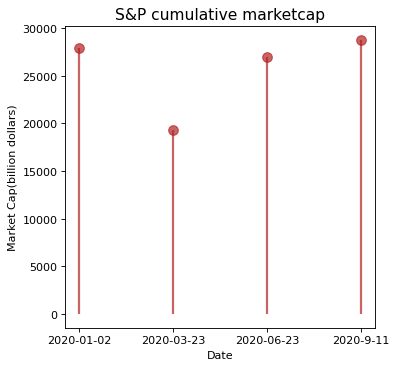

In [23]:
list1 = ['2020-01-02','2020-03-23','2020-06-23','2020-9-11']
list2 = [sum(df_total["Marketcap_1_2"])/10**9,sum(df_total["Marketcap_3_23"])/10**9,sum(df_total["Marketcap_6_23"])/10**9,sum(df_total["Marketcap_9_11"])/10**9]
#plt.bar(list1,list2) # To create bar graph
#plt.title("S&P500 cumulative Market Cap")
#plt.xlabel("Date")
#plt.ylabel("Market Cap(billion dollars)")
#plt.show

#lollipop chart
fig, ax = plt.subplots(figsize=(5,5), dpi= 80)
ax.vlines(x=list1, ymin=0, ymax=list2, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=list1, y=list2, s=75, color='firebrick', alpha=0.7)

ax.set_title('S&P cumulative marketcap', fontdict={'size':14})
ax.set_xlabel('Date')
ax.set_ylabel("Market Cap(billion dollars)")

#ax.set_xticks(list1)
#ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
#ax.set_ylim(0, 30)

plt.show()

In [24]:
#Change in the total market cap by sector

print((df_total.groupby("Sector").sum()["Marketcap_3_23"] - df_total.groupby("Sector").sum()["Marketcap_1_2"]).sort_values() / 10**9)
print((df_total.groupby("Sector").sum()["Marketcap_6_23"] - df_total.groupby("Sector").sum()["Marketcap_3_23"]).sort_values() / 10**9)
print((df_total.groupby("Sector").sum()["Marketcap_9_11"] - df_total.groupby("Sector").sum()["Marketcap_6_23"]).sort_values() / 10**9)

Sector
Information Technology   -1577.422965
Financials               -1517.208674
Health Care              -1036.088349
Industrials              -1032.287724
Consumer Discretionary    -785.575276
Communication Services    -735.080641
Energy                    -709.855659
Consumer Staples          -451.165421
Utilities                 -264.024059
Materials                 -263.468961
Real Estate               -237.286237
dtype: float64
Sector
Utilities                  169.927846
Real Estate                191.623577
Materials                  211.686856
Energy                     299.383465
Consumer Staples           333.670602
Industrials                611.259762
Financials                 717.395561
Communication Services     790.337026
Health Care               1003.927832
Consumer Discretionary    1004.100417
Information Technology    2363.036023
dtype: float64
Sector
Energy                   -140.276164
Real Estate                14.305529
Utilities                  21.096036
Fi

In [25]:
# pip install --upgrade plotly

     |████████████████████████████████| 13.0MB 300kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [26]:
import plotly.express as px
fig = px.treemap(df_total,
                 path=['Sector', 'Sub Sector', 'Security Name'],
                 values='Marketcap_9_11')

fig.update_layout(title="Market Cap of S&P500 Company by Sector&Sub-Sector as of 11 Sep 2020",
                  width=1000, height=700,)



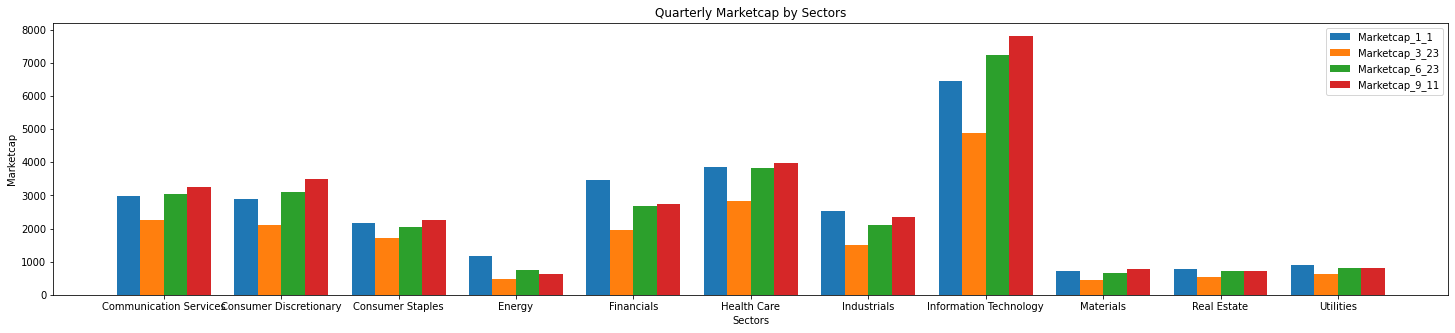

In [27]:
list1 = df_total.groupby("Sector").sum()["Marketcap_1_2"].index.tolist()
list2 = (df_total.groupby("Sector").sum()["Marketcap_1_2"]/10**9).tolist()
list3 = (df_total.groupby("Sector").sum()["Marketcap_3_23"]/10**9).tolist()
list4 = (df_total.groupby("Sector").sum()["Marketcap_6_23"]/10**9).tolist()
list5 = (df_total.groupby("Sector").sum()["Marketcap_9_11"]/10**9).tolist()


x = np.arange(len(list1))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(25,5))
rects1 = ax.bar(x - 1.5 * width, list2, width, label='Marketcap_1_1')
rects2 = ax.bar(x - width/2, list3, width, label='Marketcap_3_23')
rects3 = ax.bar(x + width/2, list4, width, label='Marketcap_6_23')
rects4 = ax.bar(x + 1.5 * width, list5, width, label='Marketcap_9_11')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Marketcap')
ax.set_xlabel('Sectors')
ax.set_title('Quarterly Marketcap by Sectors')
ax.set_xticks(x)
ax.set_xticklabels(list1)
ax.legend()

#fig.tight_layout()
plt.show()

Sector
Energy                   -64.481541
Consumer Discretionary   -45.985730
Financials               -44.257032
Industrials              -39.550057
Materials                -39.489675
Real Estate              -36.414320
Communication Services   -31.113759
Utilities                -30.821881
Information Technology   -29.698427
Health Care              -27.116580
Consumer Staples         -23.288561
Name: PercentageChange_3_23to_1_2, dtype: float64


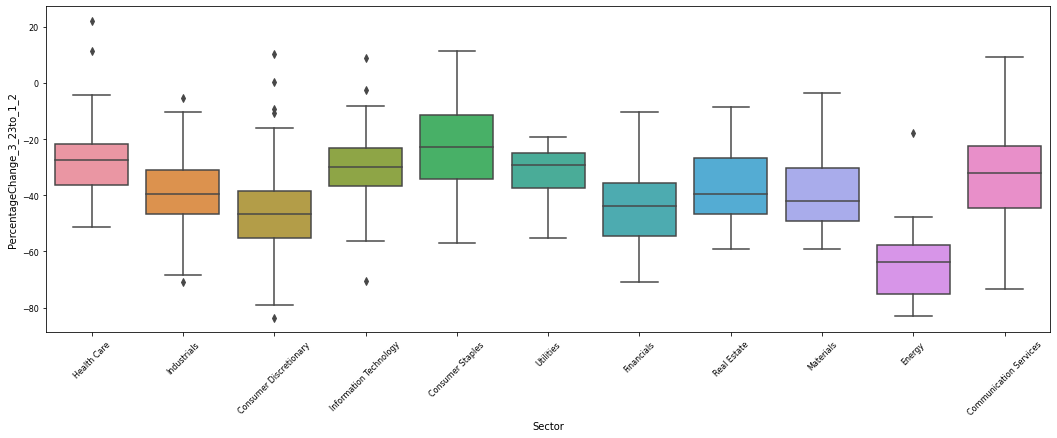

In [28]:
#Percentage Change of stock priced by sector
import seaborn as sns 
print(df_total.groupby("Sector").mean()['PercentageChange_3_23to_1_2'].sort_values())

plt.figure(figsize=(18, 6))
plt.tick_params('both', labelsize='8')
plt.xticks(rotation=45)
sns.boxplot(x="Sector", y="PercentageChange_3_23to_1_2", data=df_total)

Sub Sector
Oil & Gas Equipment & Services        -68.452691
Hotels, Resorts & Cruise Lines        -67.224524
Oil & Gas Refining & Marketing        -66.260181
Oil & Gas Exploration & Production    -66.063190
Distributors                          -61.173185
                                         ...    
Household Products                     -7.529294
Wireless Telecommunication Services    -3.677312
Gold                                   -3.609443
Hypermarkets & Super Centers           -2.981305
Food Retail                             8.443824
Name: PercentageChange_3_23to_1_2, Length: 125, dtype: float64


Text(0.5, 1.0, '% Change of Stock Price by Sub Sector from Jan to March')

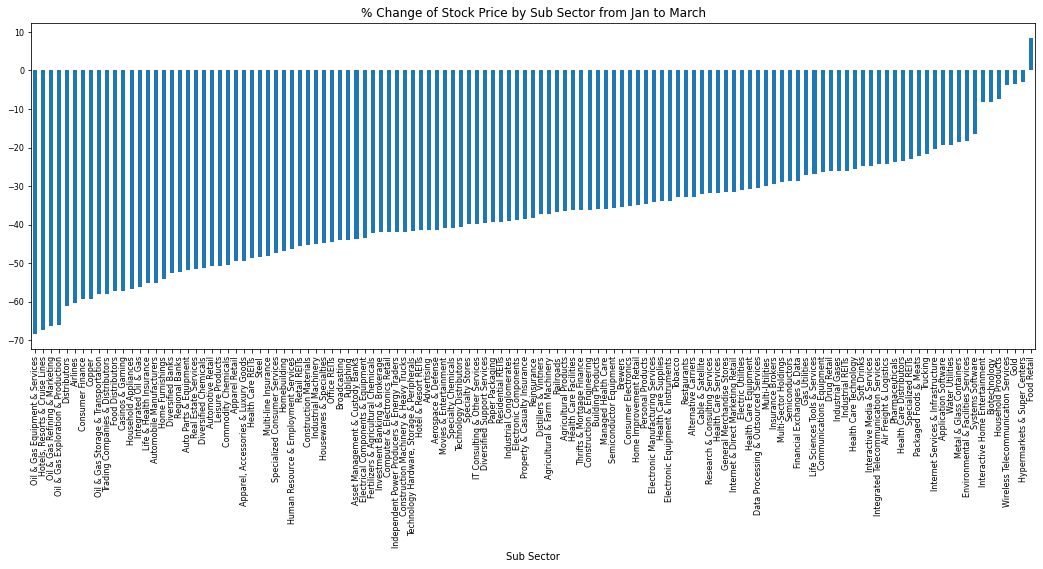

In [29]:
#Percentage Change of stock price by sub sector
print(df_total.groupby("Sub Sector").mean()['PercentageChange_3_23to_1_2'].sort_values())

plt.figure(figsize=(18, 6))
plt.tick_params('both', labelsize='8')
df_total.groupby("Sub Sector").mean()['PercentageChange_3_23to_1_2'].sort_values().plot.bar()
plt.title('% Change of Stock Price by Sub Sector from Jan to March')

Sector
Energy                   -64.481541
Consumer Discretionary   -45.985730
Financials               -44.257032
Industrials              -39.550057
Materials                -39.489675
Real Estate              -36.414320
Communication Services   -31.113759
Utilities                -30.821881
Information Technology   -29.698427
Health Care              -27.116580
Consumer Staples         -23.288561
Name: PercentageChange_3_23to_1_2, dtype: float64


Text(0.5, 1.0, '% Change of Stock Price by Sector from Jan to March')

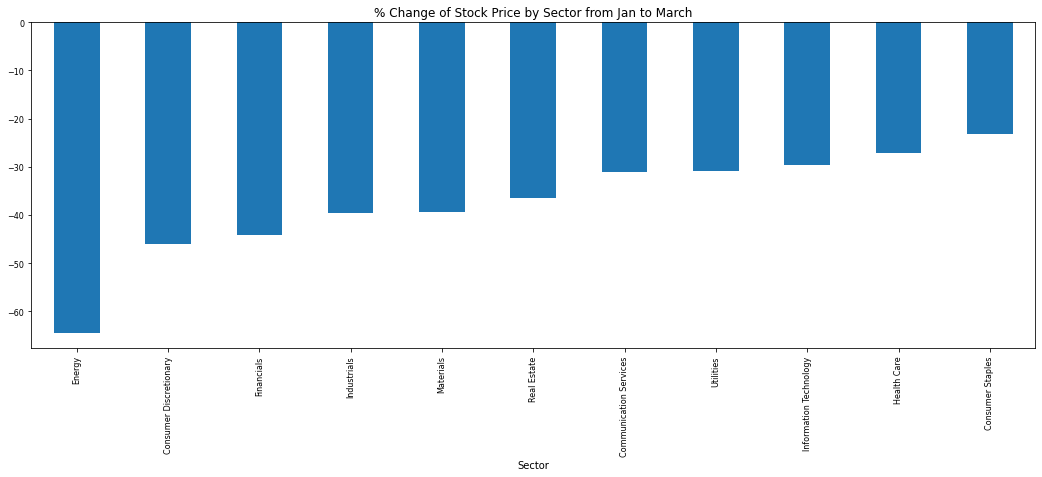

In [32]:
#Percentage Change of stock price by sub sector
print(df_total.groupby("Sector").mean()['PercentageChange_3_23to_1_2'].sort_values())

plt.figure(figsize=(18, 6))
plt.tick_params('both', labelsize='8')
df_total.groupby("Sector").mean()['PercentageChange_3_23to_1_2'].sort_values().plot.bar()
plt.title('% Change of Stock Price by Sector from Jan to March')

Sub Sector
Drug Retail                            -1.834440
Food Retail                             3.281849
Hotel & Resort REITs                    5.243441
Hypermarkets & Super Centers            5.730556
Brewers                                 9.866897
                                         ...    
Oil & Gas Refining & Marketing         92.923421
Oil & Gas Exploration & Production     93.636644
Household Appliances                   98.582990
Copper                                105.565866
Trading Companies & Distributors      117.209757
Name: PercentageChange_6_23to_3_23, Length: 125, dtype: float64


Text(0.5, 1.0, '% Change of Stock Price by Sub Sector from March to June(3 Months after Market Crash)')

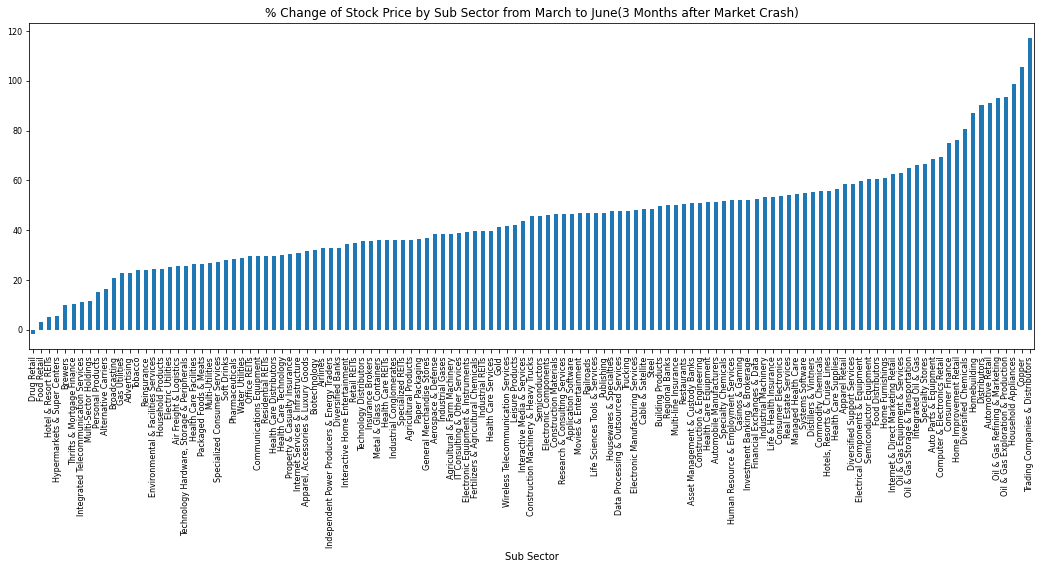

In [30]:
#Percentage Change of stock price by sub sector
print(df_total.groupby("Sub Sector").mean()['PercentageChange_6_23to_3_23'].sort_values())

plt.figure(figsize=(18, 6))
plt.tick_params('both', labelsize='8')
df_total.groupby("Sub Sector").mean()['PercentageChange_6_23to_3_23'].sort_values().plot.bar()
plt.title('% Change of Stock Price by Sub Sector from March to June(3 Months after Market Crash)')


Sector
Consumer Staples          24.945334
Utilities                 26.371745
Real Estate               33.537066
Communication Services    37.117762
Health Care               42.189237
Information Technology    42.483636
Industrials               45.369519
Financials                46.031022
Materials                 47.437084
Consumer Discretionary    56.262013
Energy                    81.120443
Name: PercentageChange_6_23to_3_23, dtype: float64


Text(0.5, 1.0, '% Change of Stock Price by Sector from March to June(3 Months after Market Crash)')

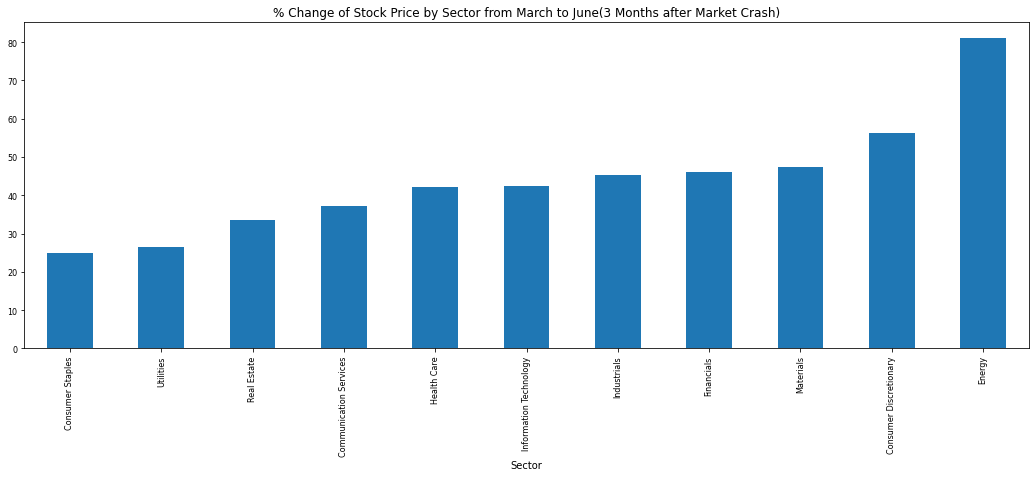

In [33]:
#Percentage Change of stock price by sector
print(df_total.groupby("Sector").mean()['PercentageChange_6_23to_3_23'].sort_values())

plt.figure(figsize=(18, 6))
plt.tick_params('both', labelsize='8')
df_total.groupby("Sector").mean()['PercentageChange_6_23to_3_23'].sort_values().plot.bar()
plt.title('% Change of Stock Price by Sector from March to June(3 Months after Market Crash)')

Sub Sector                          Sector                
Oil & Gas Refining & Marketing      Information Technology   -25.615837
Oil & Gas Exploration & Production  Information Technology   -21.445143
Drug Retail                         Information Technology   -18.944173
Integrated Oil & Gas                Information Technology   -17.833257
Thrifts & Mortgage Finance          Information Technology   -13.801863
                                                                ...    
Apparel Retail                      Information Technology    33.940451
Household Appliances                Information Technology    35.497534
Air Freight & Logistics             Information Technology    39.607641
Agricultural & Farm Machinery       Information Technology    40.270198
Copper                              Information Technology    46.841160
Name: PercentageChange_9_11to_6_23, Length: 125, dtype: float64


Text(0.5, 1.0, '% Change of Stock Price by Sub Sector from June to Sep(2.5 Months after June)')

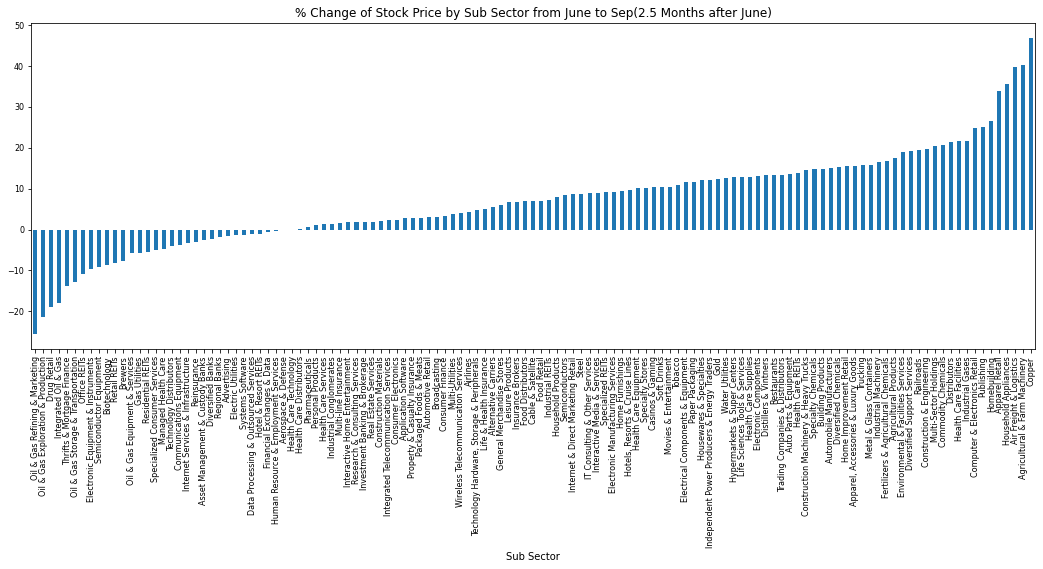

In [43]:
#Percentage Change of stock price by sub sector
print(df_total.groupby(["Sub Sector","Sector"]).mean()['PercentageChange_9_11to_6_23'].sort_values())

plt.figure(figsize=(18, 6))
plt.tick_params('both', labelsize='8')
df_total.groupby(["Sub Sector"]).mean()['PercentageChange_9_11to_6_23'].sort_values().plot.bar()
plt.title('% Change of Stock Price by Sub Sector from June to Sep(2.5 Months after June)')

Sector
Energy                   -17.660550
Financials                 0.801097
Real Estate                0.974335
Utilities                  1.942000
Information Technology     2.410396
Health Care                4.976458
Consumer Staples           5.415852
Communication Services     7.392369
Industrials               12.763277
Consumer Discretionary    14.220606
Materials                 15.091776
Name: PercentageChange_9_11to_6_23, dtype: float64


Text(0.5, 1.0, '% Change of Stock Price by Sector from June to Sep(2.5 Months after June)')

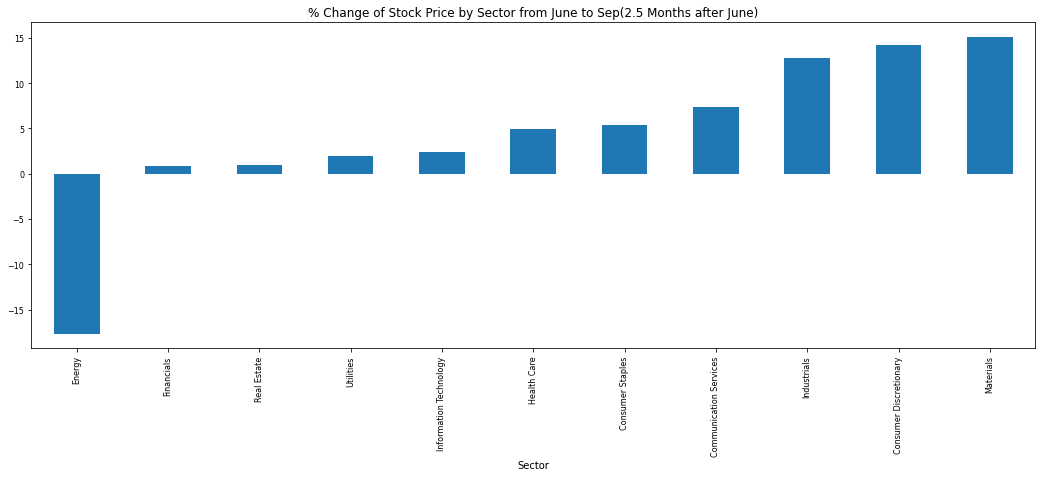

In [34]:
#Percentage Change of stock price by sector
print(df_total.groupby("Sector").mean()['PercentageChange_9_11to_6_23'].sort_values())

plt.figure(figsize=(18, 6))
plt.tick_params('both', labelsize='8')
df_total.groupby("Sector").mean()['PercentageChange_9_11to_6_23'].sort_values().plot.bar()
plt.title('% Change of Stock Price by Sub Sector from June to Sep(2.5 Months after June)')